In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
#Data Processing and Reshaping
dfx = pd.read_csv('Datasets/linearX-Copy1.csv')
dfy = pd.read_csv('Datasets/linearY-Copy1.csv')

dfx.head(n=5)
dfy.head(n=5)

x = dfx.values
y = dfy.values

x = x.reshape((-1,))
y = y.reshape((-1,))

print(x.shape,y.shape)

(99,) (99,)


In [38]:
print(dfx.head())
print(dfy.head())

   9.1
0  8.0
1  9.1
2  8.4
3  6.9
4  7.7
   0.99523
0  0.99007
1  0.99769
2  0.99386
3  0.99508
4  0.99630


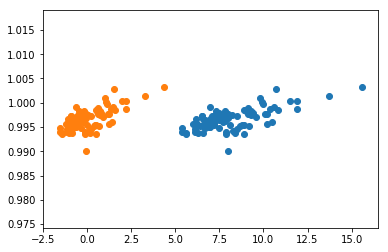

In [39]:
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()

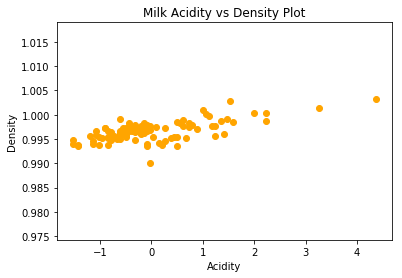

In [24]:
# Normalisation 
#plt.scatter(x,y)
x = (x - x.mean())/x.std()
plt.scatter(x,y,color='orange')
plt.xlabel("Acidity")
plt.ylabel("Density")
plt.title("Milk Acidity vs Density Plot")
plt.show()



## Linear Regression 

In [25]:
# hypothesis equations
def hypothesis(x,theta):
    return theta[0] + x*theta[1]

In [26]:
# Error calculation

def error(X,Y,theta):
    m = Y.shape[0]
    total_e = 0
    
    for i in range(m):
        h = hypothesis(X[i],theta)
        e = (Y[i] - h)**2
        total_e += e
        
    return total_e/2

In [27]:
# Gradient function returnin Slope of the equation
def gradient(X,Y,theta):
    
    m = Y.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        h = hypothesis(X[i],theta)
        grad[0] += (Y[i]-h)
        grad[1] += (Y[i] - h)*X[i]
        
    
    return grad*.5

In [33]:
# Implimenting Gradient Descent


def batch_gradient(X,Y,theta,batch_size=30):
    
    m = Y.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    grad = np.zeros((2,))
    for i in indices:
        h = hypothesis(X[i],theta)
        grad[0] += (Y[i]-h)
        grad[1] += (Y[i] - h)*X[i]
    
    return grad*0.5
        
    

def gradientDescent(X,Y,learning_rate=0.01):
    theta = np.zeros((2,))
    
    e = error(X,Y,theta)
    de =e
    error_list = [e]
    theta_list = []
    itr = 0
    
    while(itr<=10):
        grad = gradient(X,Y,theta)
        theta = theta + learning_rate*grad
        ne = error(X,Y,theta)
        theta_list.append((theta[0],theta[1]))
        error_list.append(ne)
        de = ne  - e
        e = ne
        itr += 1
    
    return error_list,theta


In [41]:
final_theta, error_list,theta_list = gradientDescent(X,Y)

ValueError: not enough values to unpack (expected 3, got 2)

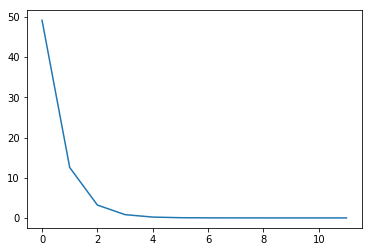

In [29]:
e,theta = gradientDescent(x,y)

plt.plot(e)
plt.show()

NameError: name 'xtest' is not defined

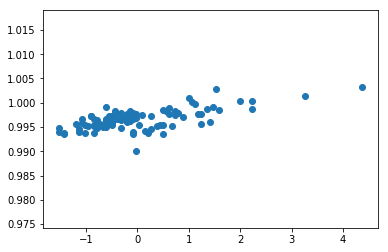

In [40]:
plt.scatter(X,Y,label='Training Data')
plt.scatter(xtest,hypothesis(xtest,final_theta),color='orange',label="Prediction")
plt.legend()
plt.show()

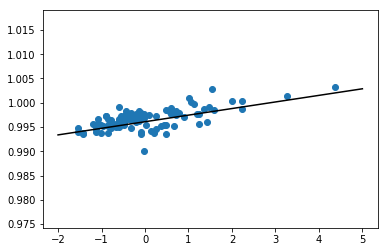

In [30]:
# Drawing result 
def drawLine(theta):
    x_pts = np.linspace(-2,5,10)
    y_pts = hypothesis(x_pts,theta)

    plt.scatter(x,y)
    plt.plot(x_pts,y_pts,color='black')

drawLine(theta)

## Visualising Gradient Descent

### Plotting Error Surface and Contours

In [ ]:
plt.contour(T0,T1,J)
plt.title("2D Contour")
th = np.array(theta_list)
plt.scatter(th[:,0],th[:,1],marker='>',label='Trajectory')
plt.legend()
plt.show()

# Working on Housing Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



data =pd.read_csv('Housing Data.csv')
data.describe()

In [ ]:
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
# no any null values so no need of fillna

### Visualization

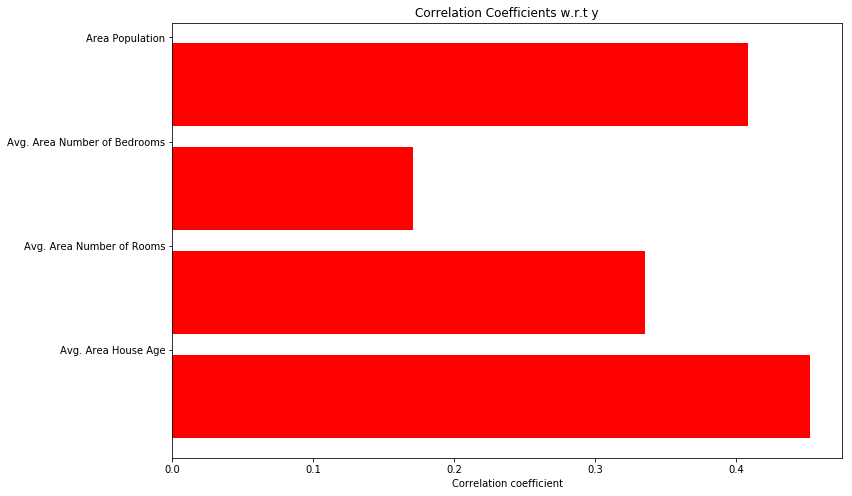

In [13]:
#plotting correlations
num_feat=data.columns[data.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(data[col].values, data.Price.values)[0,1])

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t y");

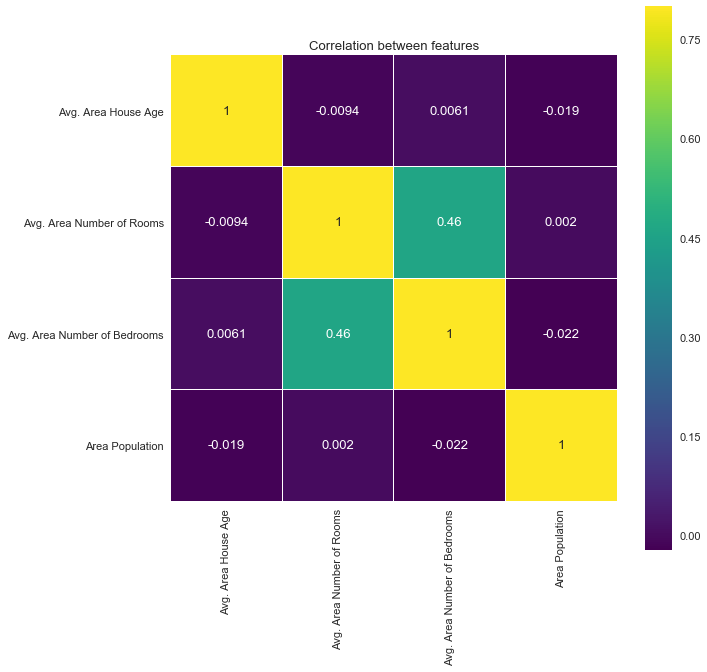

In [15]:
#Heatmap
import seaborn as sns
corrMatrix=data[num_feat].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

In [ ]:
train.hist(bins=10, figsize=(20,15), color='#E14906')
plt.show()

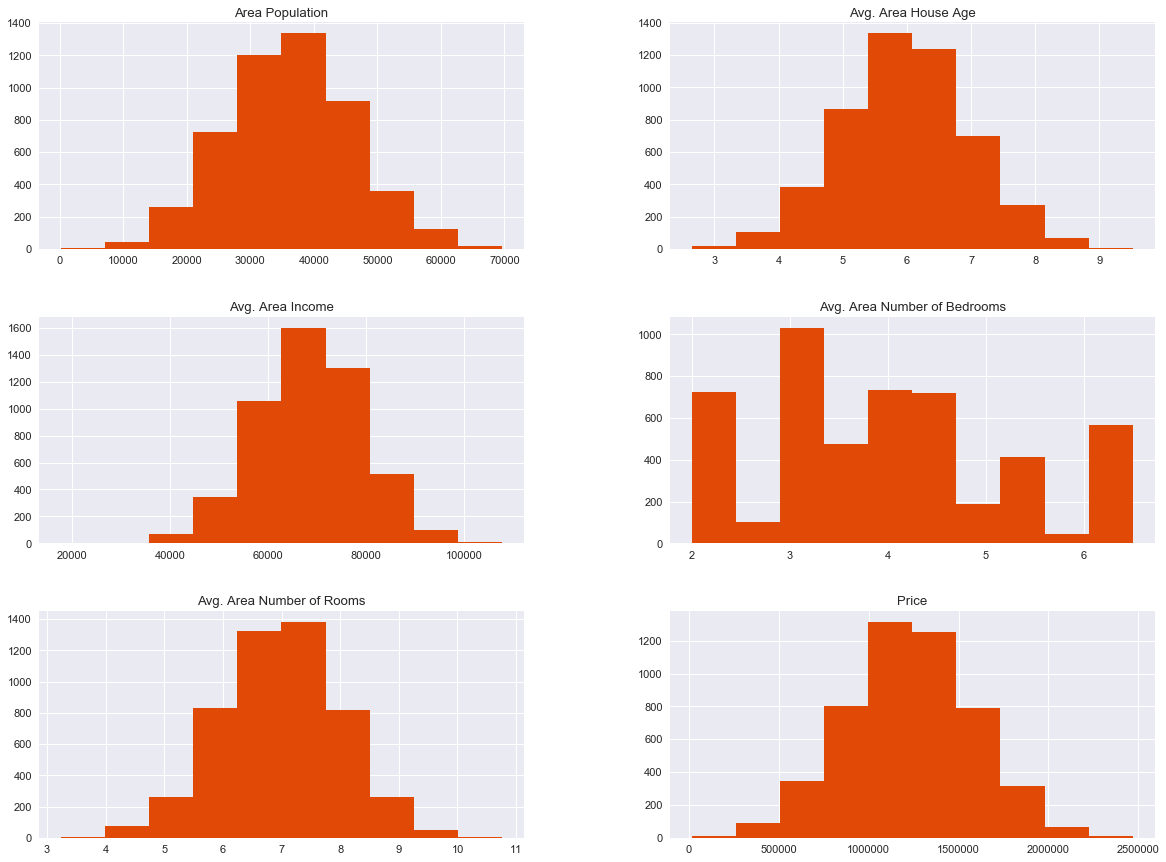

In [16]:
# Let's see how the numeric data is distributed.

data.hist(bins=10, figsize=(20,15), color='#E14906')
plt.show()

In [18]:
#Dropping not nessesary col
feature=data.drop(['Price','Address'],axis=1).values
target =data['Price'].values

In [19]:
#making train and test data
from sklearn.model_selection import train_test_split
train,test,train_label,test_label=train_test_split(feature,target,test_size=0.33,random_state=222)


In [20]:
# Implimenting Linear Regression from inbuilt function of sklearn
from sklearn.linear_model import LinearRegression
reg=LinearRegression(fit_intercept=True)
model = reg.fit(train,train_label)
predict = model.predict(test)

In [21]:
#Predicting Score
from sklearn.metrics import r2_score
print(r2_score(test_label,predict))

0.91514416048
